In [15]:
%matplotlib inline
from pylab import *
import cv2
import scipy

In [16]:
rcParams['figure.figsize'] = 10, 10

In [17]:
from dataset import load_image

In [18]:
import torch

In [19]:
from utils import cuda

In [20]:
from generate_masks import get_model

In [21]:
from albumentations import Compose, Normalize

In [22]:
from albumentations.pytorch.functional import img_to_tensor

In [23]:
def img_transform(p=1):
    return Compose([
        Normalize(p=1)
    ], p=p)


In [24]:
def mask_overlay(image, mask, color=(0, 255, 0)):
    """
    Helper function to visualize mask on the top of the car
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.uint8)
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.)
    img = image.copy()
    ind = mask[:, :, 1] > 0    
    img[ind] = weighted_sum[ind]    
    return img

In [25]:
model_path = 'data/models/unet11_binary_20.nosync/model_0.pt'
model = get_model(model_path, model_type='UNet11', problem_type='binary')

In [26]:
img_file_name = 'data/cropped_train/test.jpg'
# gt_file_name = 'data/cropped_train/instrument_dataset_3/binary_masks/frame004.png'

In [27]:
myimg = cv2.imread(str(img_file_name))

image = load_image(img_file_name)
#gt = cv2.imread(gt_file_name, 0) > 0

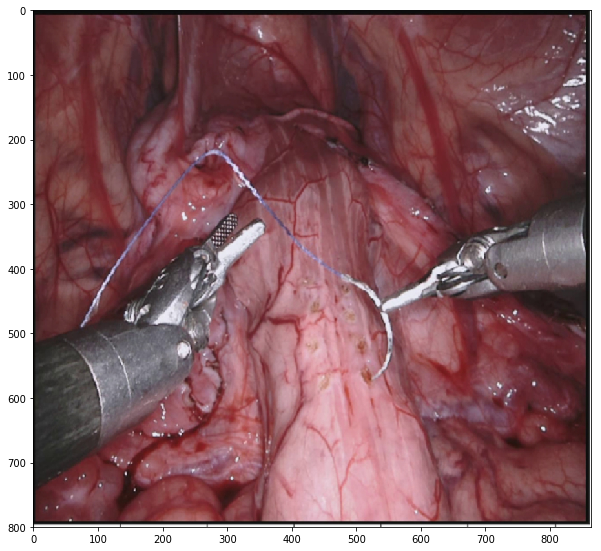

In [28]:
imshow(image)

In [29]:
image.shape
# image = cv2.resize(image, (864, 800))
# image = scipy.signal.resample(image, 1920, axis = 0); image = scipy.signal.resample(image, 1080, axis = 1)
# image.shape

(800, 864, 3)

In [30]:
with torch.no_grad():
    input_image = torch.unsqueeze(img_to_tensor(img_transform(p=1)(image=image)['image']), dim=0) # .cuda()

In [31]:
input_image.shape

torch.Size([1, 3, 800, 864])

In [32]:
mask = model(input_image)

torch.Size([1, 3, 800, 864])
torch.Size([1, 64, 800, 864])
torch.Size([1, 128, 400, 432])
torch.Size([1, 256, 200, 216])
torch.Size([1, 512, 100, 108])
torch.Size([1, 512, 50, 54])
torch.Size([1, 512, 25, 27])
torch.Size([1, 256, 50, 54])
torch.Size([1, 512, 100, 108])
torch.Size([1, 256, 100, 108])
---------
torch.Size([1, 256, 200, 216])
torch.Size([1, 128, 400, 432])
torch.Size([1, 64, 800, 864])


In [33]:
mask_array = mask.data[0].cpu().numpy()[0]

In [ ]:
grey = cv2.cvtColor(mask_array, cv2.COLOR_GRAY2BGR) 
hsv = cv2.cvtColor(grey, cv2.COLOR_BGR2HSV)

plt.imshow(hsv)
# imshow(mask_array > 0)

In [ ]:
# Calcution of Sobelx 
sobelx = cv2.Sobel(mask_array,cv2.CV_64F,1,0,ksize=5) 
      
# Calculation of Sobely 
sobely = cv2.Sobel(mask_array,cv2.CV_64F,0,1,ksize=5) 

# Calculation of Laplacian 
laplacian = cv2.Laplacian(mask_array,cv2.CV_32FC1)  

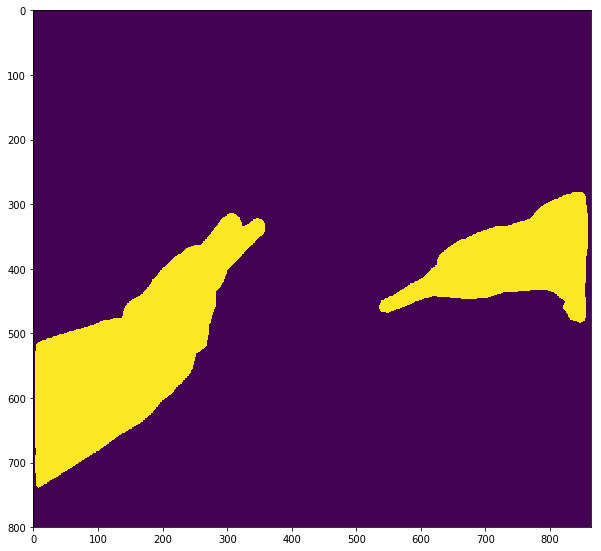

In [34]:
plt.imshow(sobelx)

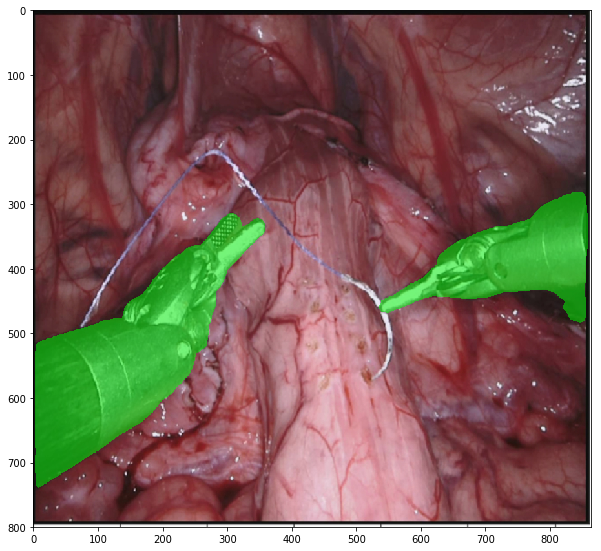

In [35]:
imshow(mask_overlay(image, (mask_array > 0).astype(np.uint8)))